In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd # is used for post hoc analysis after performing ANOVA
import seaborn as sns
sns.set()

In [2]:
url = 'https://drive.google.com/file/d/1ft6o0x9rbyAm7pWf8YGAC_hrgatwnSwd/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
eniac_a = pd.read_csv(path)

url = 'https://drive.google.com/file/d/1xozewO7gFchPGUBtBTm3i1aogxOTwu2W/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
eniac_b = pd.read_csv(path)

url = 'https://drive.google.com/file/d/1_KDS3N66B8a-5uUqNAvtIWXWOkRTS-mu/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
eniac_c  = pd.read_csv(path)

url = 'https://drive.google.com/file/d/163CQYc1LAHxcYNZPDKH1CzC_95gv3ebl/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
eniac_d  = pd.read_csv(path)


**Hypothesis testing: Chi-Square Test within the Eniac case study**

In this notebook we perform a chi-square test with the data from the Eniac case study, applying a post-hoc correction to perform pairwise tests and find the true winner.

Null Hypothesis ( H0 ): The click-through rate for all versions of the website is equal.

Alternative Hypothesis ( HA ): The click-through rate for at least one version of the website differs.

In [3]:
alpha = 0.05

In [4]:
eniac_a

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,269,True,Homepage Version A - white SHOP NOW • http...
1,25,div,mySidebar,309,True,created 2021-09-14 • 14 days 0 hours 34 mi...
2,4,a,Mac,279,True,NaN
3,69,a,iPhone,246,True,NaN
4,105,a,Accessories,1235,True,NaN
5,36,a,Chargers & Cables,1261,False,NaN
6,99,a,iPhone Accessories,1226,False,NaN
7,68,a,Watch Accessories,1261,False,NaN
8,13,a,Mac Accessories,1308,False,NaN
9,15,a,AirTag,206,False,NaN


In [5]:
eniac_a['Name']

,Name
0,ENIAC
1,mySidebar
2,Mac
3,iPhone
4,Accessories
5,Chargers & Cables
6,iPhone Accessories
7,Watch Accessories
8,Mac Accessories
9,AirTag


In [6]:
eniac_c['Name']

,Name
0,ENIAC
1,mySidebar
2,Mac
3,iPhone
4,Accessories
5,Chargers & Cables
6,iPhone Accessories
7,Watch Accessories
8,Mac Accessories
9,AirTag


In [10]:
eniac_click_a = eniac_a.loc[eniac_a['Name'] =='SHOP NOW', 'No. clicks'].iloc[0]
eniac_click_b = eniac_b.loc[eniac_b['Name'] =='SHOP NOW', 'No. clicks'].iloc[0]
eniac_click_c = eniac_c.loc[eniac_c['Name'] =='SEE DEALS', 'No. clicks'].iloc[0]
eniac_click_d = eniac_d.loc[eniac_d['Name'] =='SEE DEALS', 'No. clicks'].iloc[0]

In [11]:
eniac_click_d

np.int64(193)

**How many visits did each page get (they are in the last column of the second row, we read them manually)?**

In [14]:
eniac_a.iloc[1, -1]

'created 2021-09-14   •   14 days 0 hours 34 mins   •   25326 visits, 23174 clicks'

In [15]:
eniac_a_visits = 25326
eniac_b_visits = 24747
eniac_c_visits = 24876
eniac_d_visits = 25233

In [19]:
eniac_b.iloc[1,-1]

'created 2021-10-27   •   14 days 0 hours 34 mins   •   24747 visits, 22407 clicks'

In [17]:
eniac_a_no_click = eniac_a_visits - eniac_click_a
eniac_b_no_click = eniac_b_visits - eniac_click_b
eniac_c_no_click = eniac_c_visits - eniac_click_c
eniac_d_no_click = eniac_d_visits - eniac_click_d

In [21]:
eniac_c_no_click

np.int64(24349)

In [23]:
clicks = [eniac_click_a,eniac_click_b,eniac_click_c,eniac_click_d]
no_clicks = [eniac_a_no_click,eniac_b_no_click,eniac_c_no_click,eniac_d_no_click]
observed_results = pd.DataFrame(data = [clicks, no_clicks], columns=["Version_A", "Version_B","Version_C", 'Version_D'], index = ['Click', 'No_Click'])
observed_results

,Version_A,Version_B,Version_C,Version_D
Click,512,281,527,193
No_Click,24814,24466,24349,25040


**Calculate the test result**

In [24]:
chisq,pvalue, df ,expected = stats.chi2_contingency(observed_results)

In [26]:
pvalue

np.float64(2.7161216607868712e-48)

**Interpret the test result**

In [27]:
if pvalue > alpha:
  print("Do not reject the null hypothesis")
else:
  print("Reject the null hypothesis")

Reject the null hypothesis


***Post Hoc Tests ***

We have 6 possible dual tests to perform:


 * Version A - Version B
 * Version A - Version C
 * Version A - Version D
 * Version B - Version C
 * Version B - Version D
 * Version C - Version D

  

The level of alpha we selected for the chi-squared test cannot be same for the dual tests.Therefore, we will split the value of alpha equally among the dual tests to be performed.

In [28]:
possible_combinations = 6
alpha_post_hoc = alpha / possible_combinations
alpha_post_hoc

0.008333333333333333

Before we begin, let's have a look at the click through rates to see the relative success of each version

In [30]:
# click-through rates
eniac_a_ctr = eniac_click_a / eniac_a_visits
eniac_b_ctr = eniac_click_b / eniac_b_visits
eniac_c_ctr = eniac_click_c / eniac_c_visits
eniac_d_ctr = eniac_click_d / eniac_d_visits

# display as DataFrame
rates = [eniac_a_ctr, eniac_b_ctr, eniac_c_ctr, eniac_d_ctr]
names = ["Version_A", "Version_B", "Version_C", "Version_D"]

ctr_df = pd.DataFrame({"rates": rates, "names": names})
ctr_df.sort_values("rates", ascending=False)

,rates,names
2,0.021185,Version_C
0,0.020216,Version_A
1,0.011355,Version_B
3,0.007649,Version_D


It appears that the two white buttons have achieved the highest level of success. However, to gain a comprehensive understanding of statistical significance, we will conduct a post hoc test across all versions. Nonetheless, our primary emphasis should be on analysing the discrepancy between the white "SEE DEALS" and the white "SHOP NOW" buttons, as well as the disparity between these two and the remaining versions.

In [32]:
observed_results

,Version_A,Version_B,Version_C,Version_D
Click,512,281,527,193
No_Click,24814,24466,24349,25040


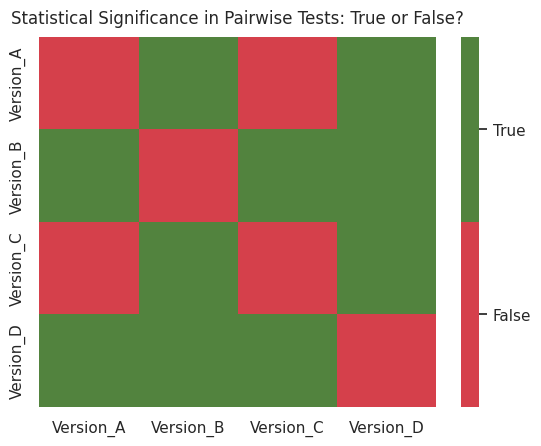

In [31]:
# empty dictionary to fill with our results
stat_significant_dict = {
                        "Version_A": [],
                        "Version_B": [],
                        "Version_C": [],
                        "Version_D": []
                         }

# compare each version to each other version
for i in observed_results.columns:
  for j in observed_results.columns:
    # use scipy to find the p-value of each pair
    chisq, pvalue, df, expected = stats.chi2_contingency(observed_results.loc[:, [i, j]], correction=False)
    # boolean: if the p-value is lower than alpha, our result is statistically significant
    stat_significant_dict[i].append(pvalue < alpha_post_hoc)

# create a DataFrame of results
stat_significant_df = pd.DataFrame(stat_significant_dict,
                                   index=observed_results.columns)

# create a heatmap from the DataFrame & red/green colour palette
red_green_palette = sns.diverging_palette(10, 120, n=2, s=70, l=50)
ax = sns.heatmap(stat_significant_df, cmap=red_green_palette)

# Manually specify colorbar labelling after it's been generated
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['False', 'True'])

# Add a title to the heatmap
ax.set_title("Statistical Significance in Pairwise Tests: True or False?", pad=10);